In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read all datasets

driver_ids = pd.read_csv('driver_ids.csv')
ride_timestamps = pd.read_csv('ride_timestamps.csv')
ride_ids = pd.read_csv('ride_ids.csv')

In [3]:
# print sample driver_id data

driver_ids.sample(2)

driver_id  driver_onboard_date
342  5c00ecb439cd4e2377e9bb3de84b0e74  2016-03-28 00:00:00
434  734e463e87289ed53edf3802a2cda9fe  2016-04-16 00:00:00

In [4]:
# explore information about driver_id data

print('Shape of the data:', driver_ids.shape)
print('unique of driver id:', len(driver_ids['driver_id'].unique()))
print('Minimum date:', driver_ids['driver_onboard_date'].min())
print('Maximum date:', driver_ids['driver_onboard_date'].max())

Shape of the data: (937, 2)
unique of driver id: 937
Minimum date: 2016-03-28 00:00:00
Maximum date: 2016-05-15 00:00:00


In [5]:
# print sample driver_id data

ride_timestamps.sample(2)

ride_id         event            timestamp
484502  8003fec65059b1d28c26a834b7a84c84    arrived_at  2016-05-27 17:31:27
685450  b4f400678e0956e714f6e58280d275cd  requested_at  2016-04-03 13:14:03

In [6]:
# explore information about ride_timestamps data

print('Shape of data:', ride_timestamps.shape)
print('unique of ride id:', len(ride_timestamps['ride_id'].unique()))
ride_timestamps['event'].value_counts()

Shape of data: (970405, 3)
unique of ride id: 194081


requested_at      194081
accepted_at       194081
arrived_at        194081
picked_up_at      194081
dropped_off_at    194081
Name: event, dtype: int64

In [7]:
# print sample ride_ids data

ride_ids.sample(2)

driver_id                           ride_id  \
96814  75ff47d4ba4bd4480629671a666500ba  454ea08bb2ee4543de59d75e29a62e75   
72736  5ccc0e6dc9c7475caf785cdce7b8eb7a  7bfec4918871f5e266ef497b0335819c   

       ride_distance  ride_duration  ride_prime_time  
96814           4494           1016               25  
72736          11843           1705                0

In [8]:
# explore information about ride_id data

print('Shape of data:', ride_ids.shape)
print('unique of driver id:', len(ride_ids['driver_id'].unique()))
print('unique of ride id:', len(ride_ids['ride_id'].unique()))
ride_ids.describe()

Shape of data: (193502, 5)
unique of driver id: 937
unique of ride id: 193502


ride_distance  ride_duration  ride_prime_time
count  193502.000000  193502.000000    193502.000000
mean     6955.218266     858.966099        17.305893
std      8929.444606     571.375818        30.825800
min        -2.000000       2.000000         0.000000
25%      2459.000000     491.000000         0.000000
50%      4015.000000     727.000000         0.000000
75%      7193.000000    1069.000000        25.000000
max    724679.000000   28204.000000       500.000000

We calculate the cost per ride using the assumptions from the Lyft rate card given:

Base Fare $2.00
Cost per Mile $1.15
Cost per Minute $0.22
Service Fee $1.75
Minimum Fare $5.00
Maximum Fare $400.00

Cost of Lyft ride: 
(basefare + cost per mile * ride_distance + cost per minute * ride_duration) * (1 + ride_prime_time/100) + service fee


In [9]:
basefare = 2.00
costpermile = 1.15
costpermin = 0.22
servicefee = 1.75
minfare = 5.00
maxfare = 400.00
ride_ids['ride_total_cost'] = ((basefare + (costpermin * (ride_ids['ride_duration']/60)) + (costpermile * (ride_ids['ride_distance'] * 0.000621))) * (1 + ride_ids['ride_prime_time']/100)) + servicefee
ride_ids['ride_total_cost'] = np.where(ride_ids['ride_total_cost'] < minfare, minfare, ride_ids['ride_total_cost'])
ride_ids['ride_total_cost'] = np.where(ride_ids['ride_total_cost'] > maxfare, maxfare, ride_ids['ride_total_cost'])
ride_ids.head(3)

driver_id                           ride_id  \
0  002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1  002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2  002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   

   ride_distance  ride_duration  ride_prime_time  ride_total_cost  
0           1811            327               50         8.488488  
1           3362            809                0         9.117306  
2           3282            572                0         8.191174

In [10]:
# pivot the ride events 

ride_events = ride_timestamps.pivot(index = 'ride_id', columns = 'event', values = 'timestamp')
ride_events.head(3)

event                                     accepted_at           arrived_at  \
ride_id                                                                      
00003037a262d9ee40e61b5c0718f7f0  2016-06-13 09:39:51  2016-06-13 09:44:31   
00005eae40882760d675da5effb89ae3  2016-05-14 05:23:25  2016-05-14 05:26:17   
000061d42cf29f73b591041d9a1b2973  2016-05-16 15:43:14  2016-05-16 15:47:29   

event                                  dropped_off_at         picked_up_at  \
ride_id                                                                      
00003037a262d9ee40e61b5c0718f7f0  2016-06-13 10:03:05  2016-06-13 09:44:33   
00005eae40882760d675da5effb89ae3  2016-05-14 05:34:17  2016-05-14 05:26:18   
000061d42cf29f73b591041d9a1b2973  2016-05-16 15:54:18  2016-05-16 15:47:32   

event                                    requested_at  
ride_id                                                
00003037a262d9ee40e61b5c0718f7f0  2016-06-13 09:39:19  
00005eae40882760d675da5effb89ae3  2016-05-14 05:23:21  
000061d42cf29f73b591041d9a1b2973  2016-05-16 15:43:09

In [11]:
# merge ride_ids data with ride events on ride_id 

ride_data = pd.merge(ride_ids, ride_events, on='ride_id')

In [12]:
# convert ride distance from meters to kilometers

ride_data["ride_distance"] = ride_data["ride_distance"]/1000
# convert ride duration from seconds to minutes 
ride_data["ride_duration"] = ride_data["ride_duration"]/60

# create data features for analysis

# the time a driver takes to accept a ride once it is requested in minutes.
ride_data['ride_accept_response_time'] = (pd.to_datetime(ride_data['accepted_at']) - pd.to_datetime(ride_data['requested_at'])).astype('timedelta64[s]')/60

# the time a driver takes to reach the pickup location once a ride is accepted in minutes.
ride_data['ride_arrival_time'] = (pd.to_datetime(ride_data['arrived_at']) - pd.to_datetime(ride_data['accepted_at'])).astype('timedelta64[s]')/60

# the time a driver waits for the rider once the driver reaches the pickup location in minutes.
ride_data['ride_wait_time'] = (pd.to_datetime(ride_data['picked_up_at']) - pd.to_datetime(ride_data['arrived_at'])).astype('timedelta64[s]')/60

# divide ride distance to 3 categories (Short ride, medium ride, long ride) dependant on ride_distance column (KM)
ride_data["ride_length"] = np.where(ride_data["ride_distance"] > ride_data['ride_distance'].quantile(0.33), (np.where(ride_data["ride_distance"] < ride_data['ride_distance'].quantile(0.66), "med_ride", "long_ride")), "short_ride")

# divide ride time to 3 categories (Morning ride, evening ride, night ride) dependant on accepted_at column (time)
ride_data["ride_time"] = np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour > 6, (np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour <= 15, "morning_ride", (np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour <= 21, "evening_ride", "night_ride")))), "night_ride")

# convert accepted_at column to date
ride_data['ride_date'] = pd.to_datetime(ride_data['accepted_at']).dt.date

# Print first 3 rows in ride data
ride_data.head(5)

driver_id                           ride_id  \
0  002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1  002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2  002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   
3  002be0ffdc997bd5c50703158b7c2491  034e861343a63ac3c18a9ceb1ce0ac69   
4  002be0ffdc997bd5c50703158b7c2491  034f2e614a2f9fc7f1c2f77647d1b981   

   ride_distance  ride_duration  ride_prime_time  ride_total_cost  \
0          1.811       5.450000               50         8.488488   
1          3.362      13.483333                0         9.117306   
2          3.282       9.533333                0         8.191174   
3         65.283      55.633333               25        77.826485   
4          4.115      13.716667              100        17.662788   

           accepted_at           arrived_at       dropped_off_at  \
0  2016-04-23 02:14:15  2016-04-23 02:16:36  2016-04-23 02:22:07   
1  2016-03-29 19:00:52  2016-03-29 19:03:57  2016-03-29 19:17:30   
2  2016-06-21 11:56:39  2016-06-21 12:01:32  2016-06-21 12:11:07   
3  2016-05-19 09:15:33  2016-05-19 09:18:20  2016-05-19 10:13:58   
4  2016-04-20 22:05:32  2016-04-20 22:07:03  2016-04-20 22:20:45   

          picked_up_at         requested_at  ride_accept_response_time  \
0  2016-04-23 02:16:40  2016-04-23 02:13:50                   0.416667   
1  2016-03-29 19:04:01  2016-03-29 19:00:49                   0.050000   
2  2016-06-21 12:01:35  2016-06-21 11:56:31                   0.133333   
3  2016-05-19 09:18:20  2016-05-19 09:15:29                   0.066667   
4  2016-04-20 22:07:02  2016-04-20 22:05:30                   0.033333   

   ride_arrival_time  ride_wait_time ride_length     ride_time   ride_date  
0           2.350000        0.066667  short_ride    night_ride  2016-04-23  
1           3.083333        0.066667    med_ride  evening_ride  2016-03-29  
2           4.883333        0.050000    med_ride  morning_ride  2016-06-21  
3           2.783333        0.000000   long_ride  morning_ride  2016-05-19  
4           1.516667       -0.016667    med_ride    night_ride  2016-04-20

In [13]:
# calculate driver_perday_ridecount

driver_perday_ridecount = ride_data.pivot_table(index = 'driver_id', columns = 'ride_date', aggfunc = 'size').fillna(0)
driver_perday_ridecount.head(5)

ride_date                         2016-03-28  2016-03-29  2016-03-30  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491         0.0         6.0         0.0   
007f0389f9c7b03ef97098422f902e62         0.0         1.0         0.0   
011e5c5dfc5c2c92501b8b24d47509bc         0.0         0.0         0.0   
0152a2f305e71d26cc964f8d4411add9         0.0         0.0         0.0   
01674381af7edd264113d4e6ed55ecda         0.0         0.0         0.0   

ride_date                         2016-03-31  2016-04-01  2016-04-02  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491         8.0         7.0         5.0   
007f0389f9c7b03ef97098422f902e62         0.0         0.0         0.0   
011e5c5dfc5c2c92501b8b24d47509bc         0.0         0.0         0.0   
0152a2f305e71d26cc964f8d4411add9         0.0         0.0         0.0   
01674381af7edd264113d4e6ed55ecda         0.0         0.0         0.0   

ride_date                         2016-04-03  2016-04-04  2016-04-05  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491         0.0         0.0         7.0   
007f0389f9c7b03ef97098422f902e62         0.0         0.0         0.0   
011e5c5dfc5c2c92501b8b24d47509bc         0.0         0.0         2.0   
0152a2f305e71d26cc964f8d4411add9         0.0         0.0         0.0   
01674381af7edd264113d4e6ed55ecda         0.0         0.0         0.0   

ride_date                         2016-04-06  ...  2016-06-17  2016-06-18  \
driver_id                                     ...                           
002be0ffdc997bd5c50703158b7c2491         0.0  ...         1.0         3.0   
007f0389f9c7b03ef97098422f902e62         0.0  ...         0.0         0.0   
011e5c5dfc5c2c92501b8b24d47509bc         3.0  ...         0.0         0.0   
0152a2f305e71d26cc964f8d4411add9         0.0  ...         4.0         0.0   
01674381af7edd264113d4e6ed55ecda         0.0  ...         8.0         0.0   

ride_date                         2016-06-19  2016-06-20  2016-06-21  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491         0.0         2.0         9.0   
007f0389f9c7b03ef97098422f902e62         0.0         0.0         0.0   
011e5c5dfc5c2c92501b8b24d47509bc         0.0         0.0         0.0   
0152a2f305e71d26cc964f8d4411add9         0.0         0.0         6.0   
01674381af7edd264113d4e6ed55ecda         0.0         9.0        10.0   

ride_date                         2016-06-22  2016-06-23  2016-06-24  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491         3.0         5.0         0.0   
007f0389f9c7b03ef97098422f902e62         2.0         0.0         0.0   
011e5c5dfc5c2c92501b8b24d47509bc         0.0         0.0         0.0   
0152a2f305e71d26cc964f8d4411add9        12.0        10.0         5.0   
01674381af7edd264113d4e6ed55ecda        13.0        13.0         9.0   

ride_date                         2016-06-25  2016-06-26  
driver_id                                                 
002be0ffdc997bd5c50703158b7c2491         0.0         0.0  
007f0389f9c7b03ef97098422f902e62         0.0         0.0  
011e5c5dfc5c2c92501b8b24d47509bc         0.0         0.0  
0152a2f305e71d26cc964f8d4411add9         6.0         3.0  
01674381af7edd264113d4e6ed55ecda         0.0         0.0  

[5 rows x 91 columns]

In [14]:
driver_info = pd.DataFrame()

# Calc. driver total ride count
driver_info['total_ride_count'] = ride_data.pivot_table(index=['driver_id'], aggfunc='size')

# Calc. driver total ride distance
driver_info['total_distance']  = ride_ids.groupby('driver_id')['ride_distance'].sum()

# Calc. driver total ride duration
driver_info['total_duration']  = ride_ids.groupby('driver_id')['ride_duration'].sum()

# Calc. driver lifetime value (total revenue)
driver_info['lifetime_value'] = ride_ids.groupby('driver_id')['ride_total_cost'].sum()

# Calc. mean driver count ride per day
driver_info['perday_ridecount_mean'] = driver_perday_ridecount.mean(axis=1)

# Calc. mean of ride accept responce time for every driver
driver_info['accept_response_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_accept_response_time': 'mean'})).iloc[:,0]

# Calc. mean of ride arrival time for every driver
driver_info['arrival_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_arrival_time': 'mean'})).iloc[:,0]

# Calc. mean of ride wait time for every driver
driver_info['wait_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_wait_time': 'mean'})).iloc[:,0]

# count total no. of short/medium/long evening rides
driver_info = pd.merge(driver_info, ride_data.pivot_table(index = 'driver_id', columns = 'ride_length', aggfunc='size') ,on='driver_id')

# count total no. of day/night/night evening rides
driver_info = pd.merge(driver_info, ride_data.pivot_table(index = 'driver_id', columns = 'ride_time', aggfunc='size') ,on='driver_id')

# fill nan value with 0
driver_info = driver_info.fillna(0).reset_index()
driver_info.head(5)

driver_id  total_ride_count  total_distance  \
0  002be0ffdc997bd5c50703158b7c2491               277         1740287   
1  007f0389f9c7b03ef97098422f902e62                31          117531   
2  011e5c5dfc5c2c92501b8b24d47509bc                34          269653   
3  0152a2f305e71d26cc964f8d4411add9               191         1471239   
4  01674381af7edd264113d4e6ed55ecda               375         3123644   

   total_duration  lifetime_value  perday_ridecount_mean  \
0          221238     3560.056648               3.043956   
1           20497      321.434698               0.340659   
2           29205      482.299206               0.373626   
3          174521     2610.189071               2.098901   
4          357443     5379.644866               4.120879   

   accept_response_time_mean  arrival_time_mean  wait_time_mean  long_ride  \
0                   0.140132           2.883153        0.087184         79   
1                   0.197312           2.952688        0.081183          5   
2                   0.121569           3.720588        0.068137         11   
3                   0.236649           3.908813        0.091885         99   
4                   0.208800           3.608133        0.136800        157   

   med_ride  short_ride  evening_ride  morning_ride  night_ride  
0       103          95         103.0          85.0        89.0  
1        15          11          24.0           6.0         1.0  
2        11          12          24.0           8.0         2.0  
3        51          41          17.0          67.0       107.0  
4       111         107           0.0         350.0        25.0

In [15]:
# Calc how long do the driver typically continue driving with Lyft
onboard_data = pd.merge(ride_data.groupby('driver_id').agg({'accepted_at': max}), driver_ids , on='driver_id')

# Calc. driver_duration the long of how driver continue driving with lyft par days
onboard_data['driver_duration'] = (pd.to_datetime(onboard_data['accepted_at']) - pd.to_datetime(onboard_data['driver_onboard_date'])).astype('timedelta64[D]')
onboard_data = onboard_data[['driver_id', 'driver_duration']]
onboard_data

driver_id  driver_duration
0    002be0ffdc997bd5c50703158b7c2491             86.0
1    007f0389f9c7b03ef97098422f902e62             85.0
2    011e5c5dfc5c2c92501b8b24d47509bc             68.0
3    0152a2f305e71d26cc964f8d4411add9             64.0
4    01674381af7edd264113d4e6ed55ecda             56.0
..                                ...              ...
832  ff419a3476e21e269e340b5f1f05414e             61.0
833  ff714a67ba8c6a108261cd81e3b77f3a             81.0
834  fff482c704d36a1afe8b8978d5486283             34.0
835  fffecccc49436c5389075b13209f0dfa             51.0
836  ffff51a71f2f185ec5e97d59dbcd7a78             53.0

[837 rows x 2 columns]

In [16]:
# merge driver_info table with driver_id

driver_info = pd.merge(driver_info, onboard_data, on = 'driver_id', how = 'inner')
driver_info

driver_id  total_ride_count  total_distance  \
0    002be0ffdc997bd5c50703158b7c2491               277         1740287   
1    007f0389f9c7b03ef97098422f902e62                31          117531   
2    011e5c5dfc5c2c92501b8b24d47509bc                34          269653   
3    0152a2f305e71d26cc964f8d4411add9               191         1471239   
4    01674381af7edd264113d4e6ed55ecda               375         3123644   
..                                ...               ...             ...   
832  ff419a3476e21e269e340b5f1f05414e               242         2002400   
833  ff714a67ba8c6a108261cd81e3b77f3a               485         2834765   
834  fff482c704d36a1afe8b8978d5486283                35          174394   
835  fffecccc49436c5389075b13209f0dfa               406         2924913   
836  ffff51a71f2f185ec5e97d59dbcd7a78               330         2372018   

     total_duration  lifetime_value  perday_ridecount_mean  \
0            221238     3560.056648               3.043956   
1             20497      321.434698               0.340659   
2             29205      482.299206               0.373626   
3            174521     2610.189071               2.098901   
4            357443     5379.644866               4.120879   
..              ...             ...                    ...   
832          246308     3537.441127               2.659341   
833          442492     6285.948397               5.329670   
834           27693      380.579655               0.384615   
835          353974     6050.600054               4.461538   
836          268641     4579.933147               3.626374   

     accept_response_time_mean  arrival_time_mean  wait_time_mean  long_ride  \
0                     0.140132           2.883153        0.087184         79   
1                     0.197312           2.952688        0.081183          5   
2                     0.121569           3.720588        0.068137         11   
3                     0.236649           3.908813        0.091885         99   
4                     0.208800           3.608133        0.136800        157   
..                         ...                ...             ...        ...   
832                   0.218939           4.651997        0.114738         98   
833                   0.177663           2.976426        0.048144        161   
834                   0.303333           3.835238        0.034762         11   
835                   0.176929           3.572619        0.191051        137   
836                   0.244848           4.702222        0.029293        121   

     med_ride  short_ride  evening_ride  morning_ride  night_ride  \
0         103          95         103.0          85.0        89.0   
1          15          11          24.0           6.0         1.0   
2          11          12          24.0           8.0         2.0   
3          51          41          17.0          67.0       107.0   
4         111         107           0.0         350.0        25.0   
..        ...         ...           ...           ...         ...   
832        56          88          56.0         161.0        25.0   
833       155         169         164.0         308.0        13.0   
834         7          17           1.0          34.0         0.0   
835       141         128         135.0         153.0       118.0   
836       119          90          73.0          49.0       208.0   

     driver_duration  
0               86.0  
1               85.0  
2               68.0  
3               64.0  
4               56.0  
..               ...  
832             61.0  
833             81.0  
834             34.0  
835             51.0  
836             53.0  

[837 rows x 16 columns]

# Exploratory Data Analysis

In [17]:
# Get description of data 

driver_info.describe()

total_ride_count  total_distance  total_duration  lifetime_value  \
count        837.000000    8.370000e+02      837.000000      837.000000   
mean         220.082437    1.528516e+06   189242.789725     2979.103812   
std          178.180347    1.259931e+06   154009.144305     2416.298144   
min            3.000000    9.895000e+03     1712.000000       25.687087   
25%           44.000000    3.390140e+05    38363.000000      618.060833   
50%          224.000000    1.451389e+06   189906.000000     2958.450547   
75%          330.000000    2.311846e+06   288097.000000     4475.228280   
max          919.000000    6.628201e+06   779797.000000    12347.102999   

       perday_ridecount_mean  accept_response_time_mean  arrival_time_mean  \
count             837.000000                 837.000000         837.000000   
mean                2.418488                   0.198516           4.417544   
std                 1.958026                   0.069286           1.406403   
min                 0.032967                   0.084074           1.668056   
25%                 0.483516                   0.158730           3.458333   
50%                 2.461538                   0.184409           4.104848   
75%                 3.626374                   0.221540           5.042160   
max                10.098901                   0.687500          12.045238   

       wait_time_mean   long_ride    med_ride  short_ride  evening_ride  \
count      837.000000  837.000000  837.000000  837.000000    837.000000   
mean         0.064720   74.874552   72.569892   72.637993     84.874552   
std          0.127561   60.894880   60.813653   62.422290     81.688592   
min         -1.387415    1.000000    1.000000    1.000000      0.000000   
25%          0.034524   18.000000   14.000000   14.000000     17.000000   
50%          0.059024   71.000000   72.000000   72.000000     60.000000   
75%          0.115833  114.000000  111.000000  112.000000    140.000000   
max          0.491954  335.000000  294.000000  313.000000    404.000000   

       morning_ride  night_ride  driver_duration  
count    837.000000  837.000000       837.000000  
mean      85.178017   50.029869        55.075269  
std       92.089711   64.935745        21.721934  
min        0.000000    0.000000         1.000000  
25%       15.000000    5.000000        42.000000  
50%       44.000000   22.000000        57.000000  
75%      139.000000   74.000000        73.000000  
max      515.000000  470.000000        90.000000

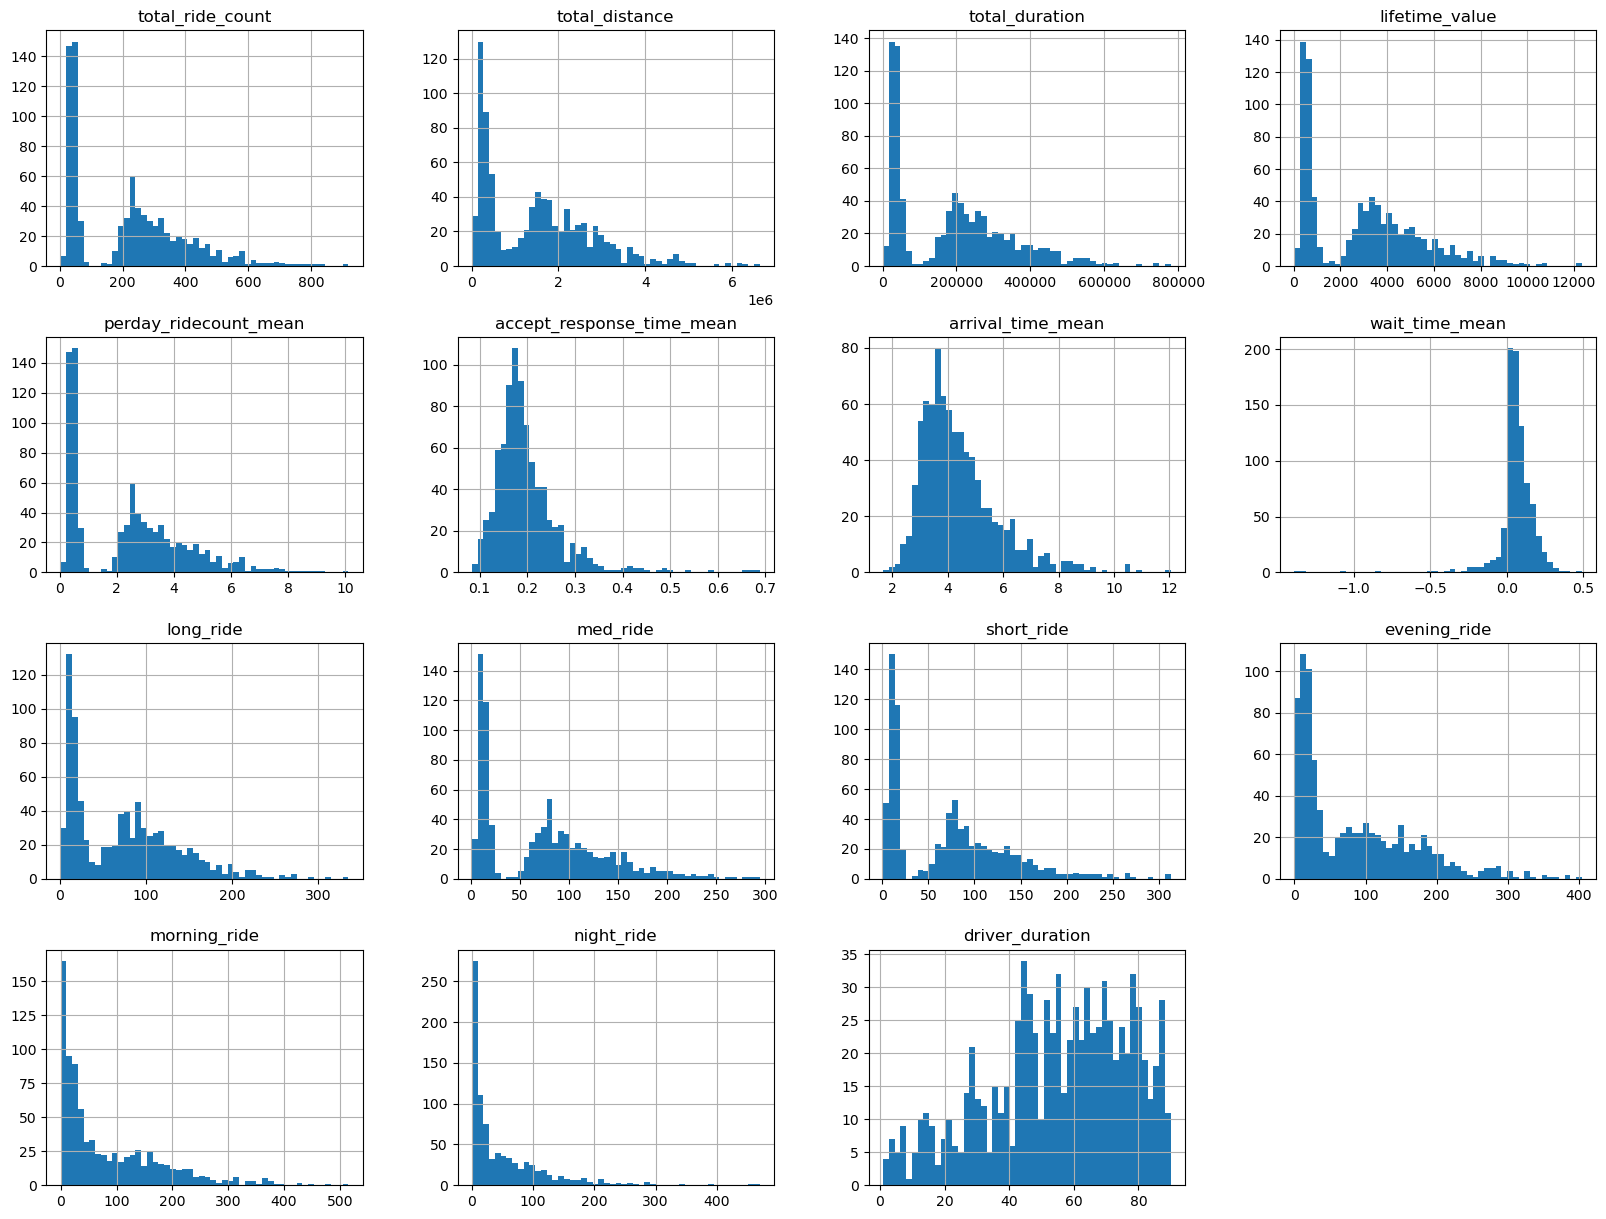

In [18]:
# Plot Histgrams of data 
driver_info.hist(bins=50, figsize=(20,15))
plt.show()

We use the `pairplot()` function from the Seaborn library to generate scatter plots for each combination of variables in the `driver_info` DataFrame. The function creates a matrix of plots, where each plot represents the relationship between two variables. This can help to visually identify any correlations or patterns in the data, and we can see the relationship between the total lifetime value and all variables, the relationship between all variables, and the driver duration with Lyft.

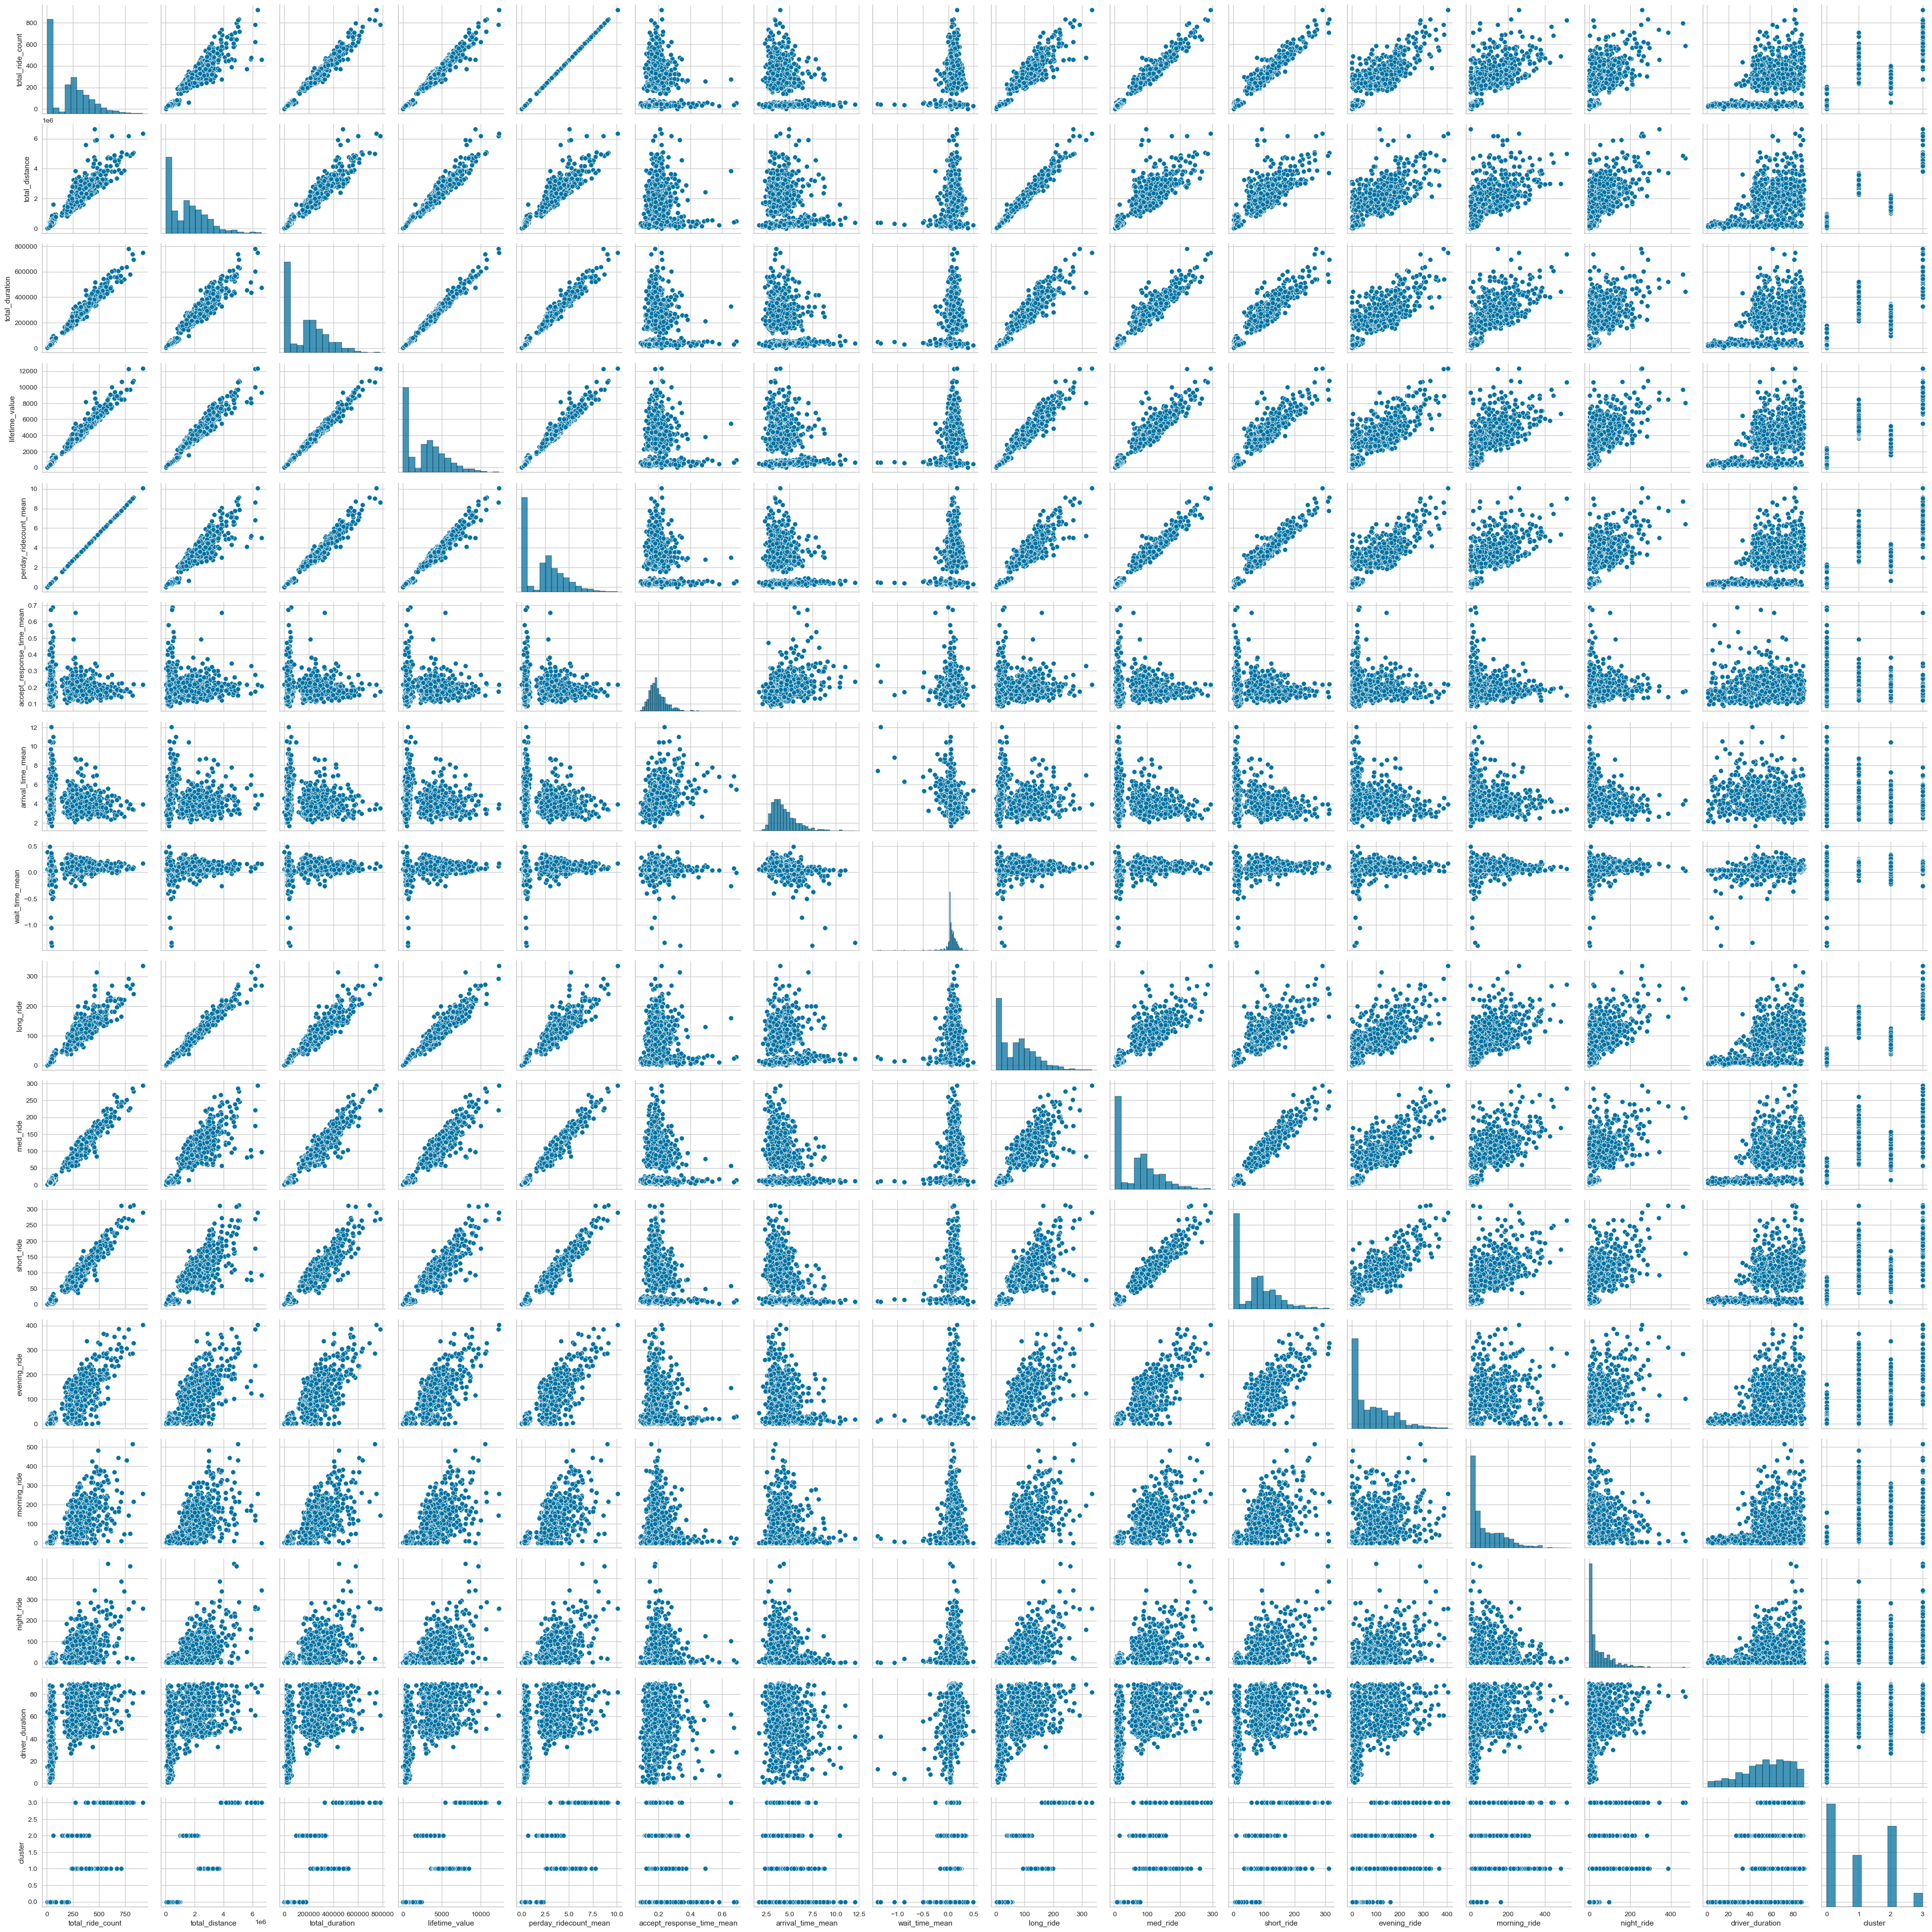

In [33]:
# scatter plots of data 
sns.pairplot(driver_info)

# Main Factors Affecting a Driver's Lifetime Value

To answer the second question of this project, we can use a correlation matrix.

First, we use the heatmap() function from the seaborn library to generate a heatmap of the correlations between the variables in the driver_info DataFrame. A heatmap is a graphical representation of data where individual values are represented as colors.

<AxesSubplot:>

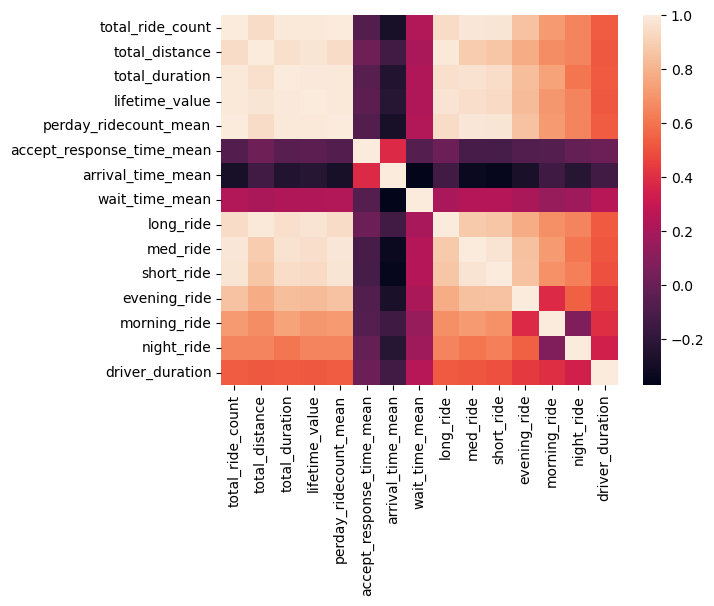

In [20]:
# plot a heatmap of correlations betweem features
sns.heatmap(driver_info.corr())

In the code below, we calculate the correlation coefficient between each feature in the driver_info DataFrame and the target variable lifetime_value.

Then, we sort the correlation coefficients in descending order, to provide information on which features are most strongly correlated with the target variable.

In [21]:
# get a correlation with lifetime_value as a DataFrame sorted in descending order
pd.DataFrame(driver_info.corr()['lifetime_value']).sort_values(by= 'lifetime_value' , ascending=False).iloc[1:]

lifetime_value
total_duration                   0.994194
total_ride_count                 0.987069
perday_ridecount_mean            0.987069
total_distance                   0.978453
long_ride                        0.971439
med_ride                         0.954142
short_ride                       0.940301
evening_ride                     0.833416
morning_ride                     0.710687
night_ride                       0.652164
driver_duration                  0.523453
wait_time_mean                   0.226387
accept_response_time_mean       -0.040457
arrival_time_mean               -0.228554

# Average Projected Lifetime of a Driver

This code is creating a graph that shows how long Lyft drivers have been working for the company. The graph is a histogram, which shows how many drivers have worked for different lengths of time. The code sets the labels for the x-axis (which shows the length of time) and the y-axis (which shows the number of drivers) and then displays the graph.

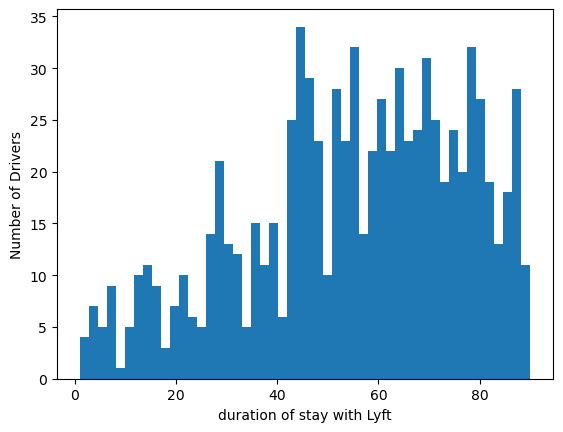

In [22]:
driver_info['driver_duration'].plot.hist(bins=50)
plt.xlabel('duration of stay with Lyft')
plt.ylabel('Number of Drivers')
plt.show()

In [23]:
#The summary statistics include the count of non-null values, the mean, the standard deviation, the minimum value, the maximum value, and the values for the 25th, 50th (median), and 75th percentiles.
driver_info['driver_duration'].describe()

count    837.000000
mean      55.075269
std       21.721934
min        1.000000
25%       42.000000
50%       57.000000
75%       73.000000
max       90.000000
Name: driver_duration, dtype: float64

# Do All Drivers Act Alike? - Clustering Exercise

To answer this question we will do a segmentation model using K-Means Clustering, to help us to know if all drivers act alike or not, and of there specific segments of drivers that generate more value for Lyft than the average driver or not.

We use KElbowVisualizer to determine the optimal number of clusters for a K-Means Clustering model. The visualization helps to select the number of clusters by finding the "elbow" point in the plot of the explained variance as a function of the number of clusters. The "elbow" point represents the trade-off between simplicity and the explained variance; the optimal number of clusters is typically chosen at the elbow point, which is the point of diminishing returns.

The KElbowVisualizer fits the KMeans model on the input data (driver_info after dropping the driver_id column) and plots the explained variance for different values of k (number of clusters), ranging from 2 to 12.

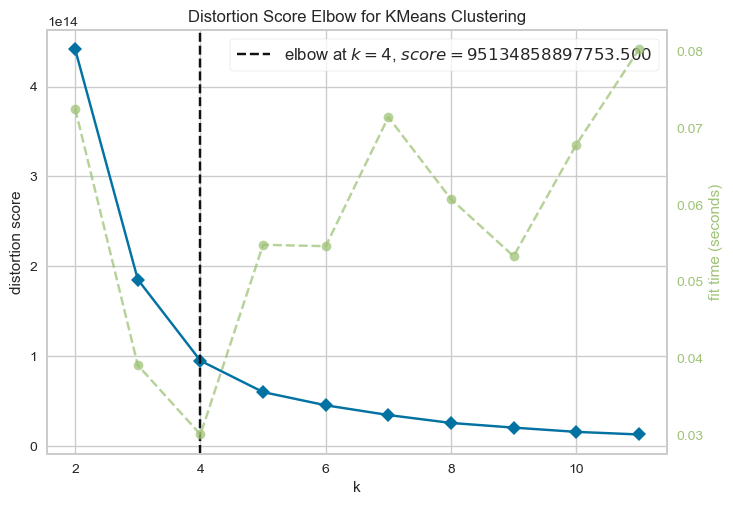

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Use the KElbowVisualizer to determine the optimal number of clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(driver_info.drop(['driver_id'], axis=1))
visualizer.show()

Our best k is 4, so we will use it to segment the data.

In the cell below, the K-Means Clustering algorithm is used to group similar drivers based on the features in the driver_info DataFrame. The number of clusters is set to 4, which is determined using the KElbowVisualizer. The K-Means model is then fit on the data by dropping the driver_id column. The result of the fit will be cluster labels for each driver.

In [25]:
# Fit a K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=42)
kmeans.fit(driver_info.drop(['driver_id'], axis=1))

KMeans(n_clusters=4, random_state=42)

We will plot some distribution to observe the differences between clusters.

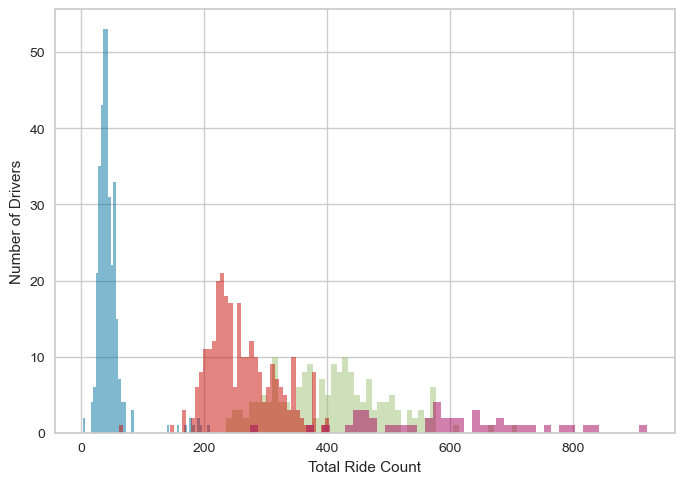

In [26]:
# Add the cluster labels to the dataframe
driver_info['cluster'] = kmeans.labels_

# Plot the distribution of total ride count by cluster
driver_info.groupby('cluster')['total_ride_count'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('Total Ride Count')
plt.ylabel('Number of Drivers')
plt.show()

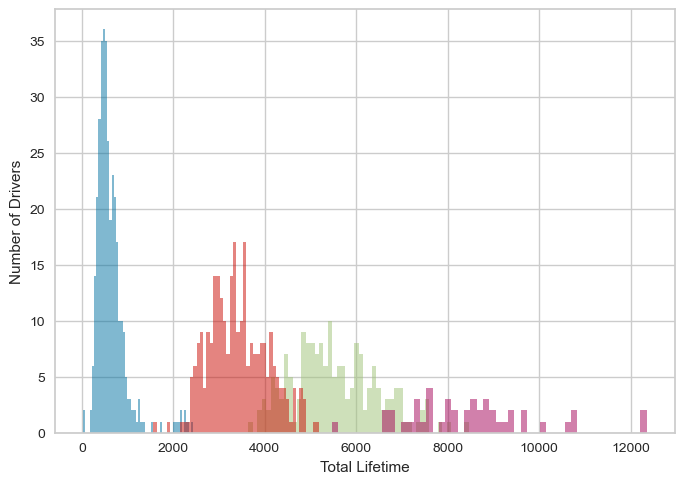

In [27]:
# Plot the distribution of total earnings by cluster
driver_info.groupby('cluster')['lifetime_value'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('Total Lifetime')
plt.ylabel('Number of Drivers')
plt.show()

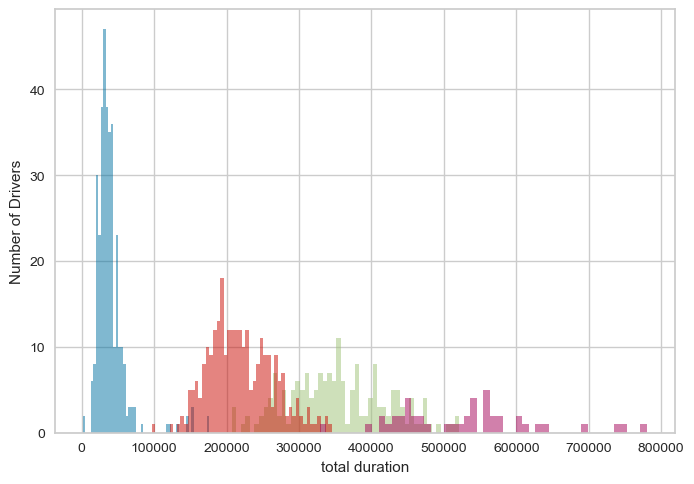

In [28]:
# Plot the distribution of total duration by cluster
driver_info.groupby('cluster')['total_duration'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total duration')
plt.ylabel('Number of Drivers')
plt.show()

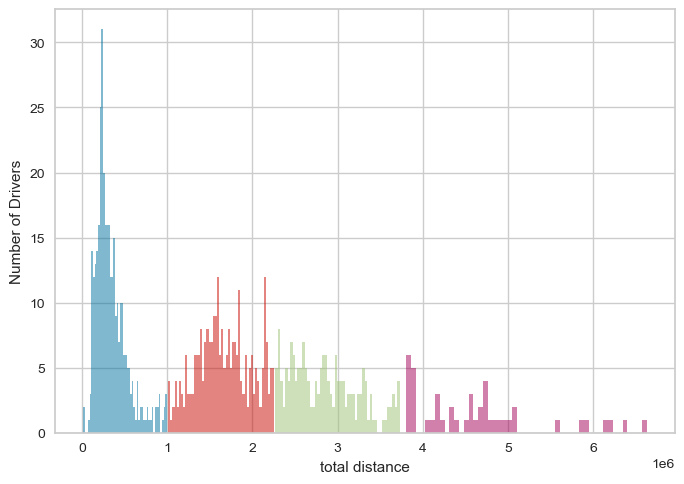

In [29]:
# Plot the distribution of total distance by cluster
driver_info.groupby('cluster')['total_distance'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total distance')
plt.ylabel('Number of Drivers')
plt.show()

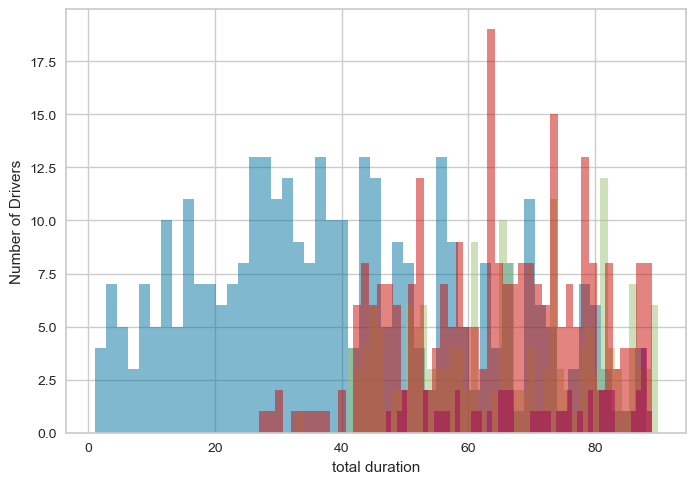

In [30]:
# Plot the distribution of driver's lifetime by cluster
driver_info.groupby('cluster')['driver_duration'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total duration')
plt.ylabel('Number of Drivers')
plt.show()

In [31]:
grouped_df = driver_info.groupby('cluster')['lifetime_value','med_ride', 'perday_ridecount_mean', 'total_ride_count', 'short_ride',
       'total_duration', 'total_distance', 'long_ride', 'evening_ride',
       'night_ride', 'morning_ride', 'driver_duration', 'wait_time_mean'].agg('mean')

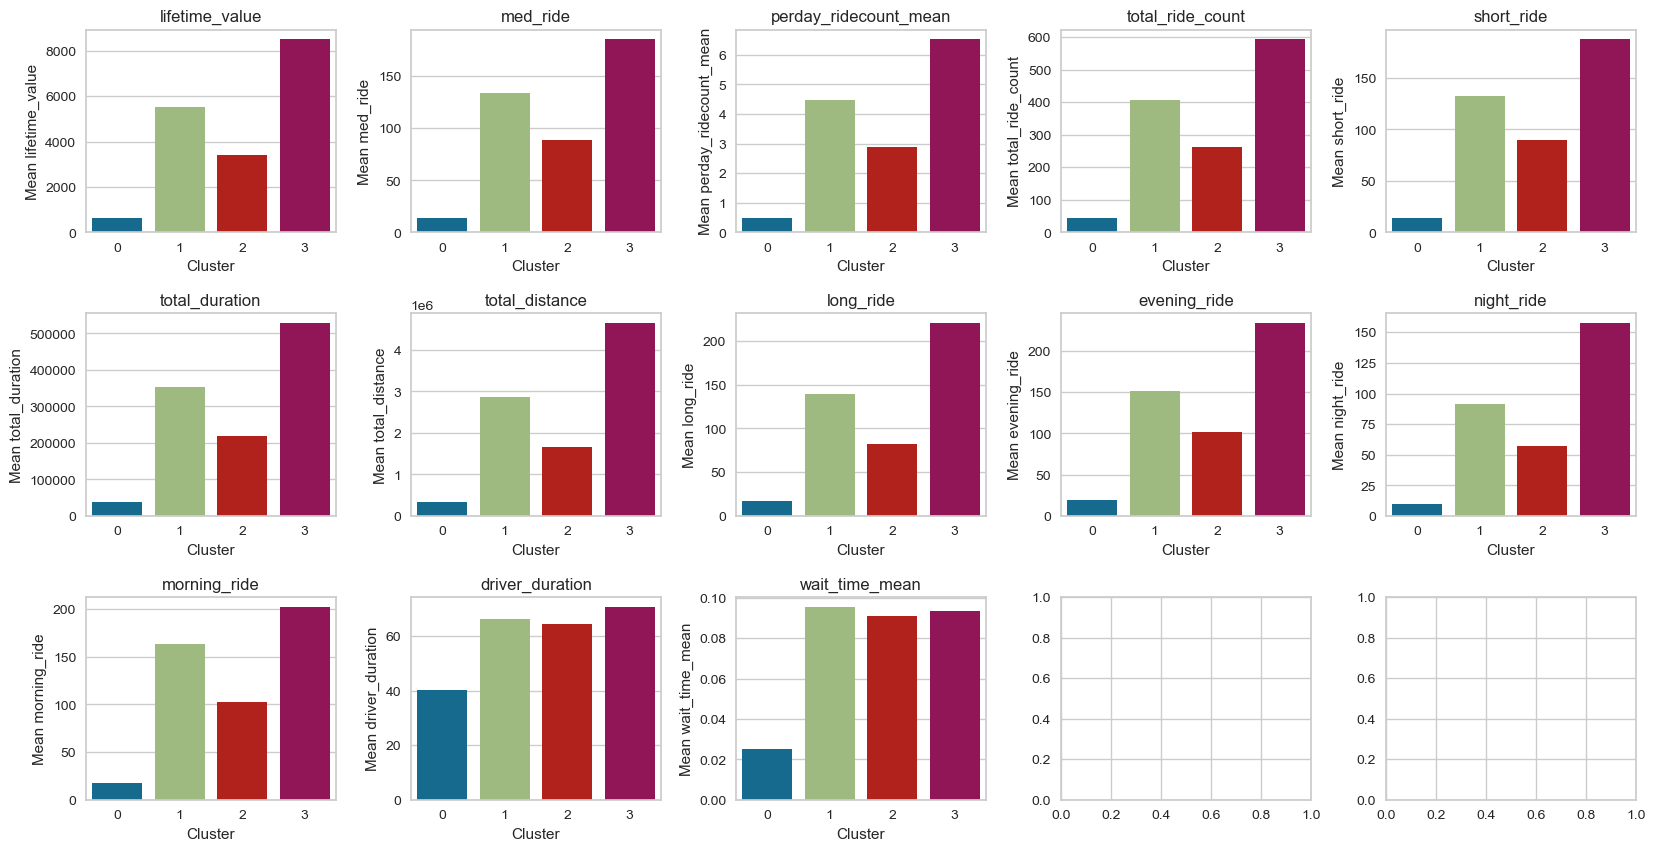

In [32]:
# create subplots for each column in the grouped dataframe
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# loop through each column in the grouped DataFrame and plot it in a subplot
for i, column in enumerate(grouped_df.columns):
    sns.barplot(x=grouped_df.index, y=grouped_df[column], ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(column)
    axes[i//5, i%5].set_xlabel('Cluster')
    axes[i//5, i%5].set_ylabel('Mean ' + column)

plt.show()

After seeing these plots we can define clusters as bad drivers, fair drivers, good drivers, and excellent drivers:

Cluster 0 is Bad drivers: This cluster has drivers with relatively low total lifetime value, low total ride count, and low total duration and distance. They may have issues with customer service, low demand for their services, or low fares.

Cluster 2 is Fair drivers: This cluster has drivers with moderate total lifetime value, ride count, duration, and distance. They may not have a high demand for their services, but they also do not have any major issues that impact their earnings.

Cluster 1 is Good drivers: This cluster has drivers with higher total lifetime value, higher ride count, and higher total duration and distance than the first two clusters. They may have a consistent demand for their services and a good reputation, leading to higher earnings.

Cluster 3 is Excellent drivers: This cluster has drivers with the highest total lifetime value, ride count, and total duration and distance. These drivers are likely the most in demand and have a good reputation for providing excellent service to their customers, leading to high earnings.

# Actionable Recommendations

Here are a few actionable recommendations based on the clustering analysis performed on the driver information data:

1. Focus on retaining good and excellent drivers: The business should focus on retaining the drivers who belong to the good and excellent clusters as they bring in more revenue and have more frequent rides compared to other drivers.

2. Target improvement of fair drivers: The business should target to improve the performance of fair drivers, to convert them into good or excellent drivers.

3. Identify and address issues faced by bad drivers: The business should identify and address the issues faced by the bad drivers, such as low earnings, low ride frequency, and low ride duration, to improve their performance.

4. Personalized incentives and training: The business can offer personalized incentives and training to drivers based on their performance clusters to further improve their performance.

5. Use clustering results for dynamic pricing: The clustering results can be used for dynamic pricing, where prices can be adjusted based on the supply and demand of drivers in a particular area.

6. Monitor performance regularly: The business should regularly monitor the performance of drivers and reassess them based on the clustering results to ensure that they are being properly targeted with the appropriate incentives and support.